## Introduction
CopyOnRead is an experiment to encode a single qubit value in 3 qubits, once in the same base and once 90° rotated.



In [24]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import *

# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3,3)

# prepare initial state:
#circ.x(0)

# q_0 is the "input" qubit
circ.barrier(range(3))
circ.cx(0, 1)
circ.cx(0, 2)
circ.h(2)

# Measure
circ.barrier(range(3))
circ.measure(range(3),range(3))

circ.draw()

░                 ░ ┌─┐      
q_0: ─░───■────■────────░─┤M├──────
      ░ ┌─┴─┐  │        ░ └╥┘┌─┐   
q_1: ─░─┤ X ├──┼────────░──╫─┤M├───
      ░ └───┘┌─┴─┐┌───┐ ░  ║ └╥┘┌─┐
q_2: ─░──────┤ X ├┤ H ├─░──╫──╫─┤M├
      ░      └───┘└───┘ ░  ║  ║ └╥┘
c: 3/══════════════════════╩══╩══╩═
                           0  1  2

{'000': 526, '100': 498}


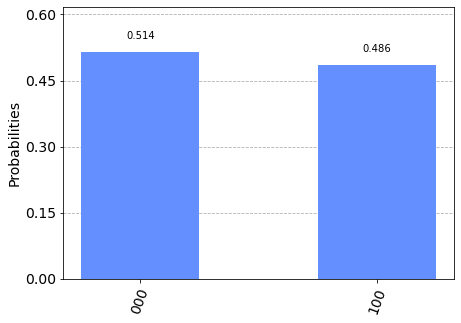

In [25]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(circ, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
plot_histogram(counts)

Job Status: job has successfully run


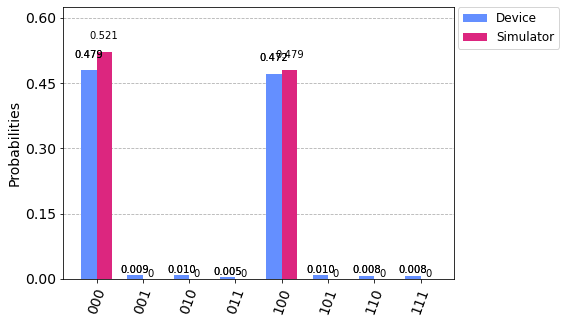

In [22]:
from qiskit import IBMQ
provider = IBMQ.load_account()

backend = provider.get_backend('ibmq_athens')
job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

In [23]:
from qiskit.tools.monitor import job_monitor
%qiskit_job_watcher

UsageError: Line magic function `%qiskit_job_watcher` not found.
